# Partie II - Evolution temporelle

Ici, on utilise l'algorithme d'Euler explicite pour obtenir l'évolution temporelle de la fonction d'onde. Cet algorithme, bien que simple à utiliser, n'est pas très efficace.

Lors de la partie 1, on utilisait un Hamiltonien à valeurs réelles, ici nous sommes obligés d'utiliser des valeurs complexes.

Imaginons que l'on obtienne un hamiltonien complexe $\psi(x)$ sous la forme d'un array numpy

In [37]:
import numpy as np
import matplotlib.pyplot as plt


# On définit d'abord les constantes dx et dt.
N = 100
L = 5
dx = L/N

M = 100000
T = 1
dt = T/M

# Puis x tel que 

x = np.linspace(-L,L,N)

On réitère ensuite la formation d'un hamiltionien vu lors de la partie 1 pour un potentiel nul

In [38]:
V = np.zeros(N) #potentiel nul

def get_matrice(V):

    d = np.zeros(N)
    e= np.zeros(N-1)

    for i in range(V.size):
        d[i] = 2/(dx**2) + V[i]

    for i in range(e.size):
        e[i] = -1/(dx**2)
        
    return d,e

d,e = get_matrice(V)

from scipy.linalg import eigh_tridiagonal

## Puis, on calcule w et v respectivement les valeurs propres et vecteurs propres de H

w, v = eigh_tridiagonal(d,e)

# On doit désormais normaliser les vecteurs propres :

def normalize(m, dx):
    m /= np.linalg.norm(m,axis=0)
    m /= np.sqrt(dx)
    return m

# On crée la fonction pour former psi à partir de V (dans le cas où V n'est plus le même)

def get_psi(V):
    d,e = get_matrice(V)
    
    w, v = eigh_tridiagonal(d,e)
    
    for vec in v:
        normalize(v,dx)
    v0 = np.zeros((N,N))
    for i in range(N):
        for y in range(N):            #On échange ligne et colonnes
            v0[i][y] = v[y][i]
    
    return w,v0

w,v = get_psi(V)


Puis, on forme la matrice H complète à partir de ses valeurs tridiagonale

In [39]:
H = np.zeros((N,N),dtype=complex)

print(H)

# on ajoute les valeurs dans H
for i in range(N):
    H[i][i] += d[i]
    if(i != N-1):
        H[i][i+1] += e[i]
        H[i+1][i] += e[i]

print(H)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]
[[ 800.+0.j -400.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [-400.+0.j  800.+0.j -400.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j -400.+0.j  800.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 ...
 [   0.+0.j    0.+0.j    0.+0.j ...  800.+0.j -400.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ... -400.+0.j  800.+0.j -400.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j -400.+0.j  800.+0.j]]


On forme ensuite une liste de liste psi\[t\]\[x\] représentant toutes les valeurs de v (le vecteur de psi) pour tout t

In [40]:
psi = np.zeros((M,N),dtype=complex)

#On pose un p défini qui représente l'énergie dans laquelle on se place

p = 0

for i in range(N):
    psi[0][i] = v[i][p]
psi[0] = normalize(psi[0],dx)
print(psi)

[[ 0.01957167+0.j -0.0391244 +0.j  0.05863928+0.j ...  0.05863928+0.j
   0.0391244 +0.j -0.01957167+0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]]


Enfin, on utilise la formule (7) du poly ce qui nous donne les valeurs de psi pour différents temps :

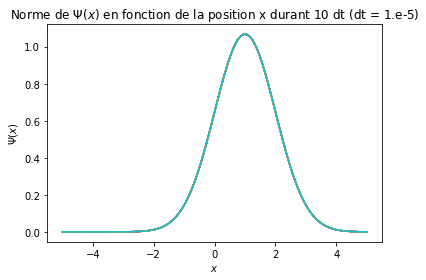

In [47]:
def pass_time(psi,H):
    for i in range(M-1):
        psi[i+1] = psi[i] - dt*np.matmul(1j*H,psi[i])
        psi[i+1] = normalize(psi[i+1],dx)
    
# On crée la fonction pour afficher les graphiques

dt_approx = np.format_float_scientific(dt, precision = 1, exp_digits=1)

def get_graph(v,name,nb_dt):
    v = np.abs(v)
    for i in range(nb_dt):
        plt.plot(x,v[i],label="Numérique $t=%i \cdot dt$" %i)
    plt.xlabel('$x$')
    plt.ylabel('$\Psi(x)$')
    plt.title('Norme de $\Psi(x)$ en fonction de la position x durant %i dt (dt = %s)' %(nb_dt,dt_approx))
    plt.savefig('docs/tempo/psi_fonction_de_x_%s_m%i_duree_%i.pdf' %(name,M,nb_dt),format='pdf')
    plt.savefig('docs/tempo/psi_fonction_de_x_%s_m%i_duree_%i' %(name,M,nb_dt))
    plt.show()

pass_time(psi,H)
get_graph(np.abs(psi),"euler_etat_statio0",10)

Ici, nous allons reprendre le même processus mais avec un état initial sous forme d'un paquet d'onde d'une gaussienne

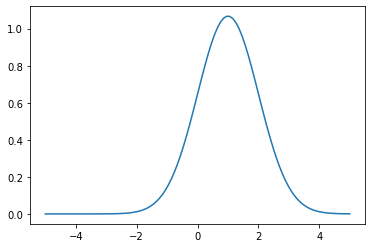

In [48]:
x0 = 1
sigma = 1

for i in range(N):
    inside_exp = -((x[i]-x0)**2)/(2*(sigma**2))
    psi[0][i] = np.exp(inside_exp)/(sigma*np.sqrt(2*np.pi))
    
psi[0] = normalize(psi[0],dx)


plt.plot(x,np.abs(psi[0]))
plt.show()

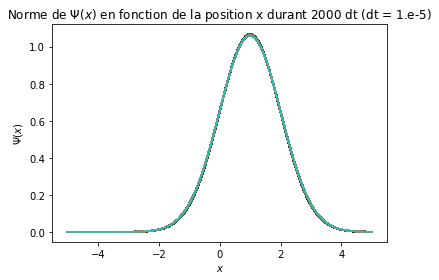

In [49]:
pass_time(psi,H)
get_graph(psi,"euler_gaussienne",2000)

On remarque ici que notre rendu n'est pas correct, en effet l'algorithme d'Euler explicite ne nous permet pas d'être suffisament précis, nous allons donc mettre en oeuvre l'algorithme de Runge-Kutta d'ordre 4

### Sources :
 - https://www.f-legrand.fr/scidoc/docmml/numerique/euler/euler/euler.html
 - https://www.youtube.com/watch?v=tsK72kSgPoI
 - https://www.moonbooks.org/Articles/How-to-create-a-matrix-of-complex-numbers-in-python-using-numpy-/
 - https://femto-physique.fr/analyse-numerique/runge-kutta.php